### Description

Message:
"Hi Revelio team, I’m working on a story about Tech companies after the big layoff rounds last year and earlier this year (2023). Do you see anything interesting in your data that you could share with me?" 

In [1]:
# importing libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import os
import glob
import matplotlib.cbook as cbook
import matplotlib.image as image

### Data Preparation

1. Import and consolidate the LinkedIn job postings data files into one file.
2. Import the layoff data from [layoffs.fyi](https://layoffs.fyi).
3. Import the layoff data from [WARN notices](https://layoffdata.com/data/).
4. Import the CPI (Consumer Price Index) data from the World Bank.


In [2]:
# Defining the function to merge the CSV files
def csv_merger(file_pattern, output):
    # Get all the files matching the pattern
    all_files = glob.glob(file_pattern)
    # Check if no files were found before proceeding
    if not all_files:
        print(f"No files found matching the pattern: {file_pattern}")
        return
    # Create an empty list to store the dataframes
    df_list = []
    total_files = len(all_files)
    # Loop through each file to read the data and append
    for i, filename in enumerate(all_files, 1):
        try:
            # Read the CSV file
            df = pd.read_csv(filename)
            df_list.append(df)
            # Print the progress
            print(f"Processed file {i}/{total_files}: {filename}")
        # If there is an error, print the error message
        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")
    # If no data was read from the files, print the message and return
    if not df_list:
        print("No data was read from the files.")
        return
    # Concatinate all the dataframes into a single dataframe
    combined = pd.concat(df_list, ignore_index=True)
    # Save the combined dataframe to a CSV file
    combined.to_csv(output, index=False)
    print(f'Combined CSV created: {output}')
    print(f'Total rows: {len(combined)}')
# Define the file pattern and output file
file_pattern = "posting__*.csv"
output = "combined_postings.csv"
csv_merger(file_pattern, output)

Processed file 1/30: posting__3_4_0.csv
Processed file 2/30: posting__1_1_0.csv
Processed file 3/30: posting__2_0_0.csv
Processed file 4/30: posting__2_2_0.csv
Processed file 5/30: posting__1_3_0.csv
Processed file 6/30: posting__0_7_0.csv
Processed file 7/30: posting__3_6_0.csv
Processed file 8/30: posting__3_2_0.csv
Processed file 9/30: posting__0_3_0.csv
Processed file 10/30: posting__1_7_0.csv
Processed file 11/30: posting__2_6_0.csv
Processed file 12/30: posting__2_4_0.csv
Processed file 13/30: posting__1_5_0.csv
Processed file 14/30: posting__0_1_0.csv
Processed file 15/30: posting__3_0_0.csv
Processed file 16/30: posting__2_3_0.csv
Processed file 17/30: posting__1_2_0.csv
Processed file 18/30: posting__3_7_0.csv
Processed file 19/30: posting__3_5_0.csv
Processed file 20/30: posting__0_4_0.csv
Processed file 21/30: posting__1_0_0.csv
Processed file 22/30: posting__2_1_0.csv
Processed file 23/30: posting__2_5_0.csv
Processed file 24/30: posting__1_4_0.csv
Processed file 25/30: pos

In [3]:
# Import layoffs data from layoffs.fyi
layoffs = pd.read_csv('layoffs_data.csv')
# Transform the date column to datetime
layoffs['Date'] = pd.to_datetime(layoffs['Date'])
# Filter the data to only include dates between 01-2022 and 12-2023 in the United States
layoffs = layoffs[(layoffs['Date'] >= '2022-01-01') & (layoffs['Date'] <= '2023-12-31') & (layoffs['Country'] == 'United States')]
# Sort the data in an ascending order
layoffs.sort_values(by='Date', inplace=True)
# Reset the index
layoffs.reset_index(drop=True, inplace=True)
# Remove the na values from the count column
layoffs = layoffs.dropna(subset=['Laid_Off_Count'])
# Display the first 5 rows
layoffs.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
1,Root Insurance,Columbus,Finance,330.0,2022-01-20,https://coverager.com/root-lays-off-a-signific...,527.0,Post-IPO,2022-01-23 22:09:42,United States,NaN,Unknown
2,Gopuff,Philadelphia,Food,100.0,2022-01-26,https://www.businessinsider.com/gopuff-elimina...,3400.0,Series H,2022-02-04 16:58:47,United States,NaN,Unknown
3,Glossier,New York City,Consumer,80.0,2022-01-26,https://techcrunch.com/2022/01/26/glossier-jus...,266.0,Series E,2022-01-26 21:48:14,United States,0.33,Unknown
4,Rhino,New York City,Real Estate,57.0,2022-02-03,https://therealdeal.com/2022/02/03/proptech-st...,133.0,Unknown,2022-02-04 23:08:49,United States,0.20,Unknown
6,Peloton,New York City,Fitness,2800.0,2022-02-08,https://techcrunch.com/2022/02/08/peloton-ceo-...,1900.0,Post-IPO,2022-02-08 17:08:53,United States,0.20,Unknown


In [4]:
# Group the data by month and sum the number of layoffs
layoffs_by_month = layoffs.groupby(pd.Grouper(key='Date', freq='M')).sum()
# Reset the index
layoffs_by_month.reset_index(inplace=True)
# Display the data
layoffs_by_month

/var/folders/ws/y4s13dw95dd92p32p0mgjt600000gn/T/ipykernel_11094/2475713340.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  layoffs_by_month = layoffs.groupby(pd.Grouper(key='Date', freq='M')).sum()


,Date,Laid_Off_Count,Funds_Raised,Percentage
0,2022-01-31,510.0,4193.0,0.330
1,2022-02-28,3285.0,3556.0,1.510
2,2022-03-31,4105.0,7273.0,1.340
3,2022-04-30,1958.0,130761.0,1.620
4,2022-05-31,6367.0,135816.0,4.030
5,2022-06-30,9451.0,152941.0,12.260
6,2022-07-31,8836.0,42683.0,9.990
7,2022-08-31,9800.0,35993.0,8.430
8,2022-09-30,3396.0,130937.0,4.345
9,2022-10-31,10446.0,24472.0,9.170


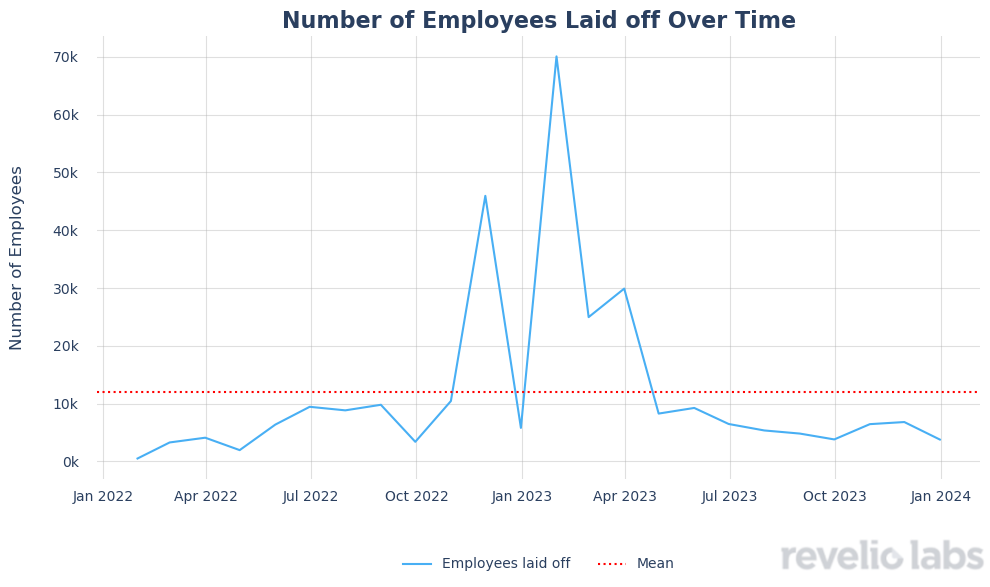

In [5]:
# Plotting the data using matplotlib and formatting it like the rest of the Revelio Labs plots
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the line chart for the number of employees laid off over time
ax.plot(layoffs_by_month['Date'], layoffs_by_month['Laid_Off_Count'], color='#48aff4', label='Employees laid off')
# Plot the mean line of the number of laid off employees for the given time range
ax.axhline(y=layoffs_by_month['Laid_Off_Count'].mean(), color='red', linestyle='dotted', label='Mean')
# Add title and labels
ax.set_title('Number of Employees Laid off Over Time', fontsize=16, fontweight='bold', color='#2a3f5f')
ax.set_ylabel('Number of Employees', fontsize=12, color='#2a3f5f')
# Format the axes and ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}k'.format(x / 1000)))
plt.tick_params(left=False, bottom=False)
# Remove borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Change color of ticks 
ax.tick_params(axis='x', colors='#2a3f5f')
ax.tick_params(axis='y', colors='#2a3f5f')
# Add space between tick labels and ticks
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
# Add space between the y label and the y axis
ax.yaxis.labelpad = 20
# Add the grid
plt.grid(alpha=0.4)
# Add the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), frameon=False, ncol=2)
# Change the legend text color
plt.setp(ax.get_legend().get_texts(), color='#2a3f5f')
# Adjust layout to fit the plot well
plt.tight_layout()
# Add the Revelio Labs watermark to make the plot look professional and branded
# Get the absolute path of the current Jupyter Notebook file
notebook_path = '/Users/giorgikukishvili/Desktop/revelio/newsletter.ipynb'
# Get the directory path of the notebook file
notebook_dir = os.path.dirname(notebook_path)
# Access the 'revelio_watermark.png' file
watermark_path = os.path.join(notebook_dir, 'revelio_watermark.png')
# Open the watermark image through the right path
with open(watermark_path, 'rb') as file:
    revelio_img = plt.imread(file)
# Add the watermark to the plot 
fig.figimage(revelio_img, fig.bbox.xmax - revelio_img.shape[1]-10, fig.bbox.ymin+10, zorder=3, alpha=0.7)
# Show the plot
plt.show()

In [6]:
# Import the WARN layoffs data
warn_layoffs = pd.read_csv('warn_layoff.csv')

In [7]:
# Transform the date column to datetime
warn_layoffs['WARN Received Date'] = pd.to_datetime(warn_layoffs['WARN Received Date'])
# Sort the data in an ascending order
warn_layoffs.sort_values(by='WARN Received Date', inplace=True)
# Drop any na values 
warn_layoffs.dropna(subset=['Number of Workers'], inplace=True)
# Reset the index
warn_layoffs.reset_index(drop=True, inplace=True)
# Select the relevant columns
warn_layoffs = warn_layoffs[['WARN Received Date', 'Number of Workers']]
# Convert the number of workers to numeric dtype
warn_layoffs['Number of Workers'] = pd.to_numeric(warn_layoffs['Number of Workers'], errors='coerce')
# Group by the month and sum the number of workers for that specific month
warn_layoffs_by_month = warn_layoffs.groupby(pd.Grouper(key='WARN Received Date', freq='M'))['Number of Workers'].sum()
# Filter the data to only include dates between 01-2020 and 12-2023
layoffs_for_2022_2024 = warn_layoffs_by_month[(warn_layoffs_by_month.index >= '2022-01-01') & (warn_layoffs_by_month.index <= '2023-12-31')]
# Write the series object into a dataframe
layoffs_for_2022_2024 = layoffs_for_2022_2024.to_frame()
# Reset the index
layoffs_for_2022_2024.reset_index(inplace=True)
layoffs_for_2022_2024

,WARN Received Date,Number of Workers
0,2022-01-31,12613.0
1,2022-02-28,5204.0
2,2022-03-31,14989.0
3,2022-04-30,14006.0
4,2022-05-31,13359.0
5,2022-06-30,12568.0
6,2022-07-31,15556.0
7,2022-08-31,17463.0
8,2022-09-30,17782.0
9,2022-10-31,20183.0


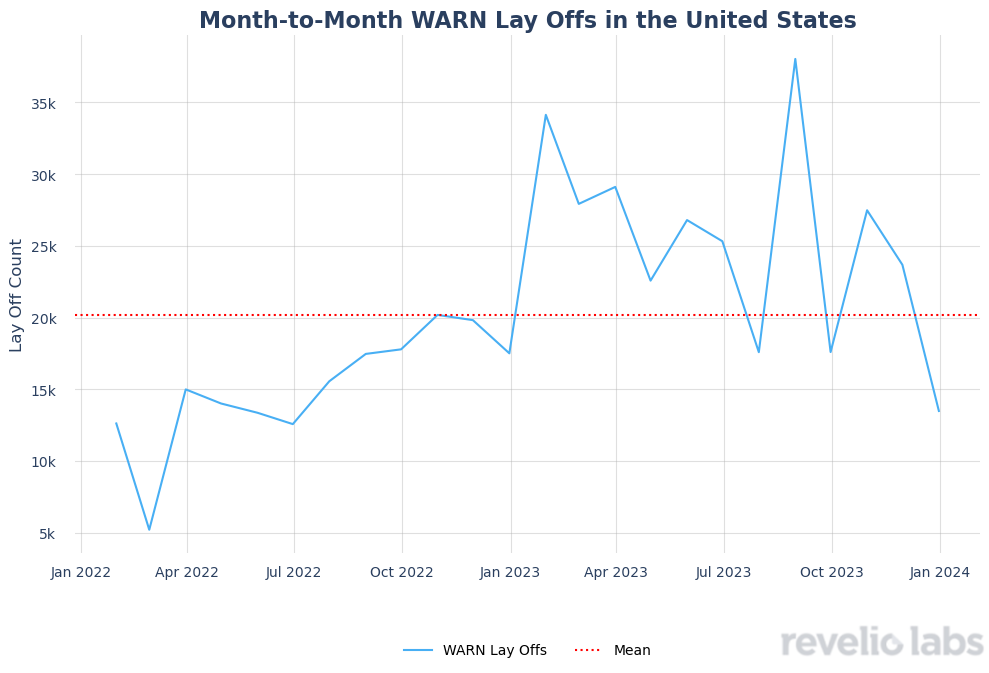

In [8]:
# Visualize WARN data
fig, ax = plt.subplots(figsize=(10, 6))
# Display the data from range 2021-01-01 to 2024-01-01
ax.plot(layoffs_for_2022_2024['WARN Received Date'], layoffs_for_2022_2024['Number of Workers'], color='#48aff4', label='WARN Lay Offs')
# Add title and labels
ax.set_title('Month-to-Month WARN Lay Offs in the United States', fontsize=16, fontweight='bold', color='#2a3f5f')
ax.set_ylabel('Lay Off Count', color='#2a3f5f', fontsize=12)
# Format the axis and ticks
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}k'.format(x / 1000)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.tick_params(left=False, bottom=False)
# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)
# Change color of ticks 
ax.tick_params(axis='x', colors='#2a3f5f')
ax.tick_params(axis='y', colors='#2a3f5f')
# Add space between tick labels and ticks
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
# Display the mean of the range from 2021 to 2024
ax.axhline(y=layoffs_for_2022_2024['Number of Workers'].mean(), color='red', linestyle='dotted', label='Mean')
# Tight layout
plt.tight_layout()
# Add and format the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), frameon=False, ncol=5)
# Add the grid
ax.grid(alpha=0.4)
# Add the watermark (Revelio Labs)
# Construct the correct path to the 'revelio_watermark.png' file
watermark_path = os.path.join(notebook_dir, 'revelio_watermark.png')
# Open and load the watermark
with open(watermark_path, 'rb') as file:
    revelio_img = plt.imread(file)
# Add the watermark to the plot 
fig.figimage(revelio_img, fig.bbox.xmax - revelio_img.shape[1] - 10, fig.bbox.ymin + 10, zorder=3, alpha=0.7)
# Show the plot
plt.show()


In [9]:
# Import the US inflation rates data
cpi = pd.read_csv('US_inflation_rates.csv')
# Transform the date column to datetime
cpi['date'] = pd.to_datetime(cpi['date'])
# Filter the data to only include dates between 01-2022 and 12-2023
cpi = cpi[(cpi['date'] >= '2022-01-01') & (cpi['date'] <= '2023-12-31')]
cpi.reset_index(drop=True, inplace=True)
cpi

,date,value
0,2022-01-01,282.599
1,2022-02-01,284.610
2,2022-03-01,287.472
3,2022-04-01,288.611
4,2022-05-01,291.268
5,2022-06-01,294.728
6,2022-07-01,294.628
7,2022-08-01,295.320
8,2022-09-01,296.539
9,2022-10-01,297.987


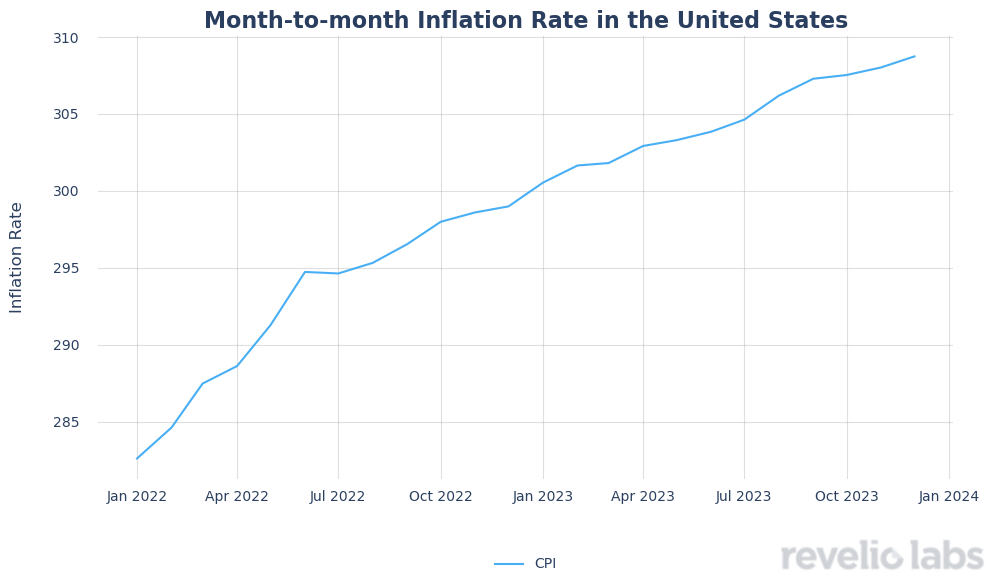

In [10]:
# Plotting the data using matplotlib and formatting it like the rest of the Revelio Labs plots
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the line chart for the CPI value over time
ax.plot(cpi['date'], cpi['value'], color='#48aff4', label='CPI')
# Add title and labels
ax.set_title('Month-to-month Inflation Rate in the United States', fontsize=16, fontweight='bold', color='#2a3f5f')
ax.set_ylabel('Inflation Rate', fontsize=12, color='#2a3f5f')
# Format the axes and ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}k'.format(x / 1000)))
plt.tick_params(left=False, bottom=False)
# Remove borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Change color of ticks 
ax.tick_params(axis='x', colors='#2a3f5f')
ax.tick_params(axis='y', colors='#2a3f5f')
# Add space between tick labels and ticks
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
# Add space between the y label and the y axis
ax.yaxis.labelpad = 20
# Add the grid
plt.grid(alpha=0.4)
# Add the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), frameon=False, ncol=2)
# Change the legend text color
plt.setp(ax.get_legend().get_texts(), color='#2a3f5f')
# Adjust layout to fit the plot well
plt.tight_layout()
# Add the watermark (Revelio Labs)
# Open and load the watermark
with open(watermark_path, 'rb') as file:
    revelio_img = plt.imread(file)
# Add the watermark to the plot 
fig.figimage(revelio_img, fig.bbox.xmax - revelio_img.shape[1] - 10, fig.bbox.ymin + 10, zorder=3, alpha=0.7)
# Show the plot
plt.show()
# Show plot
plt.show()

In [11]:
# Calculate the percentage change in the inflation rate
cpi['inflation_change'] = cpi['value'].pct_change() * 100
# Display the first 5 rows
cpi

,date,value,inflation_change
0,2022-01-01,282.599,NaN
1,2022-02-01,284.610,0.711609
2,2022-03-01,287.472,1.005587
3,2022-04-01,288.611,0.396213
4,2022-05-01,291.268,0.920616
5,2022-06-01,294.728,1.187909
6,2022-07-01,294.628,-0.033930
7,2022-08-01,295.320,0.234872
8,2022-09-01,296.539,0.412773
9,2022-10-01,297.987,0.488300


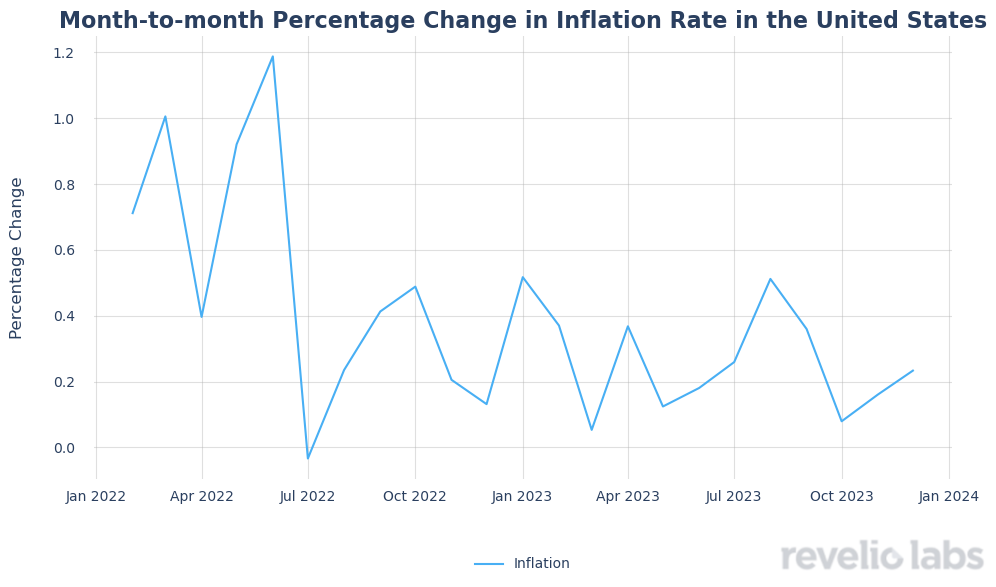

In [12]:
# Graph the percentage change in the inflation rate
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the line chart for the percentage change in the inflation rate over time
ax.plot(cpi['date'], cpi['inflation_change'], color='#48aff4', label='Inflation')
# Add title and labels
ax.set_title('Month-to-month Percentage Change in Inflation Rate in the United States', fontsize=16, fontweight='bold', color='#2a3f5f')
ax.set_ylabel('Percentage Change', fontsize=12, color='#2a3f5f')
# Format the axes and ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# Mean inflation change
plt.tick_params(left=False, bottom=False)
# Remove borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Change color of ticks
ax.tick_params(axis='x', colors='#2a3f5f')
ax.tick_params(axis='y', colors='#2a3f5f')
# Add space between tick labels and ticks
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
# Add space between the y label and the y axis
ax.yaxis.labelpad = 20
# Add the grid
plt.grid(alpha=0.4)
# Add the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), frameon=False, ncol=2)
# Change the legend text color
plt.setp(ax.get_legend().get_texts(), color='#2a3f5f')
# Adjust layout to fit the plot well
plt.tight_layout()
# Add the watermark (Revelio Labs)
# Open and load the watermark
with open(watermark_path, 'rb') as file:
    revelio_img = plt.imread(file)
# Add the watermark to the plot
fig.figimage(revelio_img, fig.bbox.xmax - revelio_img.shape[1] - 10, fig.bbox.ymin + 10, zorder=3, alpha=0.7)
# Show the plot
plt.show()

In [13]:
# Check the column names of the dataframes
# print(cpi.columns) WARN Received Date
# print(layoffs_for_2022_2024.columns) date
# Merge only on monyh and year
merged_data = pd.merge(cpi, layoffs_for_2022_2024, how='inner', left_on=cpi['date'].dt.to_period('M'), right_on=layoffs_for_2022_2024['WARN Received Date'].dt.to_period('M'))
# Find the correlation between the inflation rate and the number of layoffs
correlation = merged_data['value'].corr(merged_data['Number of Workers'])
correlation

0.6301022464926677

In [14]:
# Check what percentage of layoffs were from FAANG companies
# Get the unique company names

company_names = layoffs['Company'].unique().tolist()   
company_names.sort()
# Apple is not in the layoffs.fyi data
faang_layoffs = layoffs[layoffs['Company'].str.contains('Meta|Apple|Amazon|Netflix|Google', regex=True, case=False)]
# Layoffs from FAANG companies excluding Apple since Apple layoffs are absent from both datasets
faang_layoffs_count = faang_layoffs['Laid_Off_Count'].sum()
# Total layoffs count
total_layoffs_count = layoffs['Laid_Off_Count'].sum()
faang_layoffs_count
total_layoffs_count

289856.0

In [15]:
# Calculate the total number of layoffs from 2022 to 2023 from the WARN data
warn = pd.read_csv('warn_layoff.csv')
warn['Number of Workers'] = pd.to_numeric(warn['Number of Workers'], errors='coerce')
warn['WARN Received Date'] = pd.to_datetime(warn['WARN Received Date'])
warn = warn[(warn['WARN Received Date'] >= '2022-01-01') & (warn['WARN Received Date'] <= '2023-12-31')]
warn.dropna(subset=['Number of Workers'], inplace=True)
total_layoffs = warn['Number of Workers'].sum()

In [22]:
# The percentage of layoffs from FAANG companies compared to the total number of layoffs
print(f'The percentage of layoffs from FAANG companies compared to the total layoffs:{round(faang_layoffs_count/total_layoffs * 100,2)}%')
print(f'The percentage of layoffs from FAANG companies compared to the total layoffs in the technology sector:{round(faang_layoffs_count/total_layoffs_count * 100,2)}%')

The percentage of layoffs from FAANG companies compared to the total layoffs:12.59%
The percentage of layoffs from FAANG companies compared to the total layoffs in the technology sector:21.06%


In [17]:
# Load the job postings data
job_postings = pd.read_csv('combined_postings.csv')
# Transform the date columns to datetime
job_postings['post_date'] = pd.to_datetime(job_postings['post_date'])
job_postings['remove_date'] = pd.to_datetime(job_postings['remove_date'])
job_postings

,job_id,company,country,state,mapped_role,role_k50,role_k150,job_category,salary,post_date,remove_date,rcid,ultimate_parent_rcid,ultimate_parent_company_name,jobtitle_raw,jobtitle_translated
0,2971851242,"Meta Platforms, Inc.",United States,empty,marketing research,Product Manager,Market Research,Sales,NaN,2022-03-20,2022-04-19,1233178,1233178,"Meta Platforms, Inc.",Taxonomist - Marketplace,taxonomist marketplace
1,3072956781,Microsoft Corp.,United States,GA,data scientist,Data Analyst,Data Scientist,Engineer,132000.0,2022-04-16,2022-05-16,350953,350953,Microsoft Corp.,Delivery Data Scientist,delivery data scientist
2,3604001140,"Apple, Inc.",United States,ID,cyber security,Infrastructure Engineer,Information Security,Engineer,NaN,2023-05-16,2023-05-19,1232095,1232095,"Apple, Inc.",Vulnerability Researcher,vulnerability researcher
3,2962523263,"Whole Foods Market, Inc.",United States,CA,sandwich artist,Crew Member,Crew Member,Sales,50500.0,2022-03-08,2022-03-10,22142809,1359692,"Amazon.com, Inc.",Prepared Foods Team Member (Deli Service Count...,prepared foods team member deli service counte...
4,2943561976,"Meta Platforms, Inc.",United States,NY,data scientist,Data Analyst,Data Scientist,Engineer,NaN,2022-03-02,2022-03-04,1233178,1233178,"Meta Platforms, Inc.","Data Scientist, Machine Learning - Product Ana...",data scientist machine learning product anal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421816,2732486388,"Apple, Inc.",United States,CA,hardware design engineer,Application Engineer,Test Engineer,Engineer,NaN,2021-09-01,2021-11-14,1232095,1232095,"Apple, Inc.",Optical Sensing HW - Design Verification Engin...,optical sensing hw design verification engin...
4421817,2705515811,Instagram LLC,Brazil,São Paulo,communications consultant,Communications Specialist,Communications Specialist,Marketing,NaN,2021-09-04,2021-09-10,334617,1233178,"Meta Platforms, Inc.","Instagram Consumer Communications Manager, Brazil",instagram consumer communications manager brazil
4421818,2847168791,"Apple, Inc.",United States,CA,systems architect,Software Engineer,Technology Lead,Engineer,159000.0,2021-12-21,2021-12-25,1232095,1232095,"Apple, Inc.",Software Engineer : Enterprise Platform Services,software engineer enterprise platform services
4421819,2488374512,"Amazon Web Services, Inc.",United States,TX,solutions architect,Software Engineer,Technology Lead,Engineer,129000.0,2021-04-06,2021-05-07,970845,1359692,"Amazon.com, Inc.",Software Development Manager - AWS Console Pla...,software development manager aws console pla...


In [18]:
# Filter the data to only include dates between 01-2022 and 12-2023
job_postings = job_postings[(job_postings['post_date'] >= '2020-01-01') & (job_postings['post_date'] <= '2023-12-31')]
# Sort by job posting date in ascending order
job_postings.sort_values(by='post_date', inplace=True)

In [19]:
# The percentage of job postings on the platform from FAANG companies compared to the total number of job postings
faang_job_postings = job_postings[job_postings['company'].str.contains('Meta Platforms, Inc.|Apple, Inc.|Amazon.com, Inc.|Netflix, Inc.|Alphabet, Inc.', regex=True, case=False)]
total_job_postings = len(job_postings)
faang_job_postings_count = len(faang_job_postings)
print(total_job_postings)
print(faang_job_postings_count)
print(faang_job_postings_count/total_job_postings * 100)
job_postings.head()

4421821
2208814
49.95258740686246


,job_id,company,country,state,mapped_role,role_k50,role_k150,job_category,salary,post_date,remove_date,rcid,ultimate_parent_rcid,ultimate_parent_company_name,jobtitle_raw,jobtitle_translated
1514382,2283757785,"Whole Foods Market, Inc.",United States,SC,sandwich artist,Crew Member,Crew Member,Sales,NaN,2020-05-10,2021-11-08,22142809,1359692,"Amazon.com, Inc.",Bakery Team Member - Part Time,bakery team member part time
2819151,2283389040,"Amazon.com, Inc.",United States,MA,product support engineer,Technician,Technical Support Engineer,Engineer,NaN,2020-05-10,2020-06-10,1359692,1359692,"Amazon.com, Inc.",Product Support Engineer,product support engineer
1270152,2283478800,Bethesda Softworks LLC,United States,MD,help analyst,IT Specialist,Technical Support,Engineer,NaN,2020-05-10,2020-06-28,53236,350953,Microsoft Corp.,IT Support Specialist,it support specialist
1228579,2281612680,"Whole Foods Market, Inc.",United States,OR,sandwich artist,Crew Member,Crew Member,Sales,NaN,2020-05-10,2021-11-09,22142809,1359692,"Amazon.com, Inc.",Produce Team Member/Clerk - Part Time,produce team member clerk part time
4393081,2283759405,"Whole Foods Market, Inc.",United States,CA,cake decorator,Crew Member,Crew Member,Sales,NaN,2020-05-10,2021-11-08,22142809,1359692,"Amazon.com, Inc.",Whole Body Team Member ( Part-Time),whole body team member part time


In [20]:
job_postings_by_category = job_postings.groupby(['job_category', pd.Grouper(key='post_date', freq='M')]).size().unstack()
job_removals_by_category = job_postings.groupby(['job_category', pd.Grouper(key='remove_date', freq='M')]).size().unstack()
# Find the difference between the number of job postings and removals for each month
change = job_postings_by_category.sub(job_removals_by_category, fill_value=0)
# Reset the index
change.reset_index(inplace=True)
# Transpose the dataframe
change = change.T
# Set the first row as the column names
change.columns = change.iloc[0]
# Drop the first row
change = change[1:]
# Reset the index
change.reset_index(inplace=True)
# Rename the index column to 'Date'
change.rename(columns={'index': 'Date'}, inplace=True)
# Change non-date columns to numeric
change.iloc[:, 1:] = change.iloc[:, 1:].apply(pd.to_numeric)
# Divide in two parts
change_before_2022 = change[(change['Date'] >= '2020-01-01') & (change['Date'] <= '2021-12-31')]
change_after_2022 = change[(change['Date'] >= '2022-01-01') & (change['Date'] <= '2023-12-31')]
change_after_2022

/var/folders/ws/y4s13dw95dd92p32p0mgjt600000gn/T/ipykernel_11094/1940720006.py:18: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  change.iloc[:, 1:] = change.iloc[:, 1:].apply(pd.to_numeric)


job_category,Date,Admin,Engineer,Finance,Marketing,Operations,Sales,Scientist
20,2022-01-31,1.0,-8312.0,-296.0,-282.0,259.0,2675.0,-697.0
21,2022-02-28,2280.0,-28459.0,710.0,4357.0,503.0,3173.0,1073.0
22,2022-03-31,8537.0,30200.0,3663.0,8797.0,3737.0,12929.0,2244.0
23,2022-04-30,-9373.0,-76095.0,-3237.0,-11003.0,-4628.0,-14533.0,-2458.0
24,2022-05-31,-5697.0,-35207.0,-1811.0,-7949.0,-2003.0,-9017.0,-2565.0
25,2022-06-30,-2728.0,-27249.0,-1679.0,-6457.0,-1469.0,-10443.0,-1227.0
26,2022-07-31,-135.0,7518.0,242.0,980.0,899.0,5130.0,89.0
27,2022-08-31,-676.0,-7084.0,-429.0,-1599.0,-608.0,-1775.0,-82.0
28,2022-09-30,-230.0,4030.0,112.0,258.0,1068.0,863.0,174.0
29,2022-10-31,113.0,-4618.0,-14.0,-1129.0,-686.0,-5133.0,-249.0


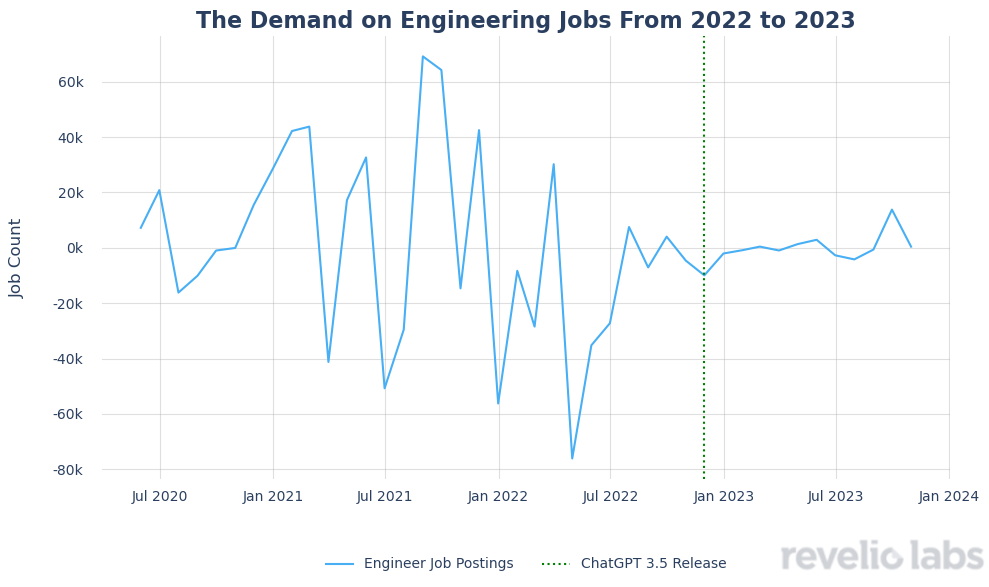

In [21]:
# Plot the engineer job changes in the labor market from 2022-01 to 2023-12
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the line chart for the number of job postings and removals for the engineer job category
ax.plot(change['Date'], change['Engineer'], color='#48aff4', label='Engineer Job Postings')
# Add title and labels
ax.set_title('The Demand on Engineering Jobs From 2022 to 2023', fontsize=16, fontweight='bold', color='#2a3f5f')
# Add the line for the release of ChatGPT 3.5
ax.axvline(x=pd.to_datetime('2022-11-30'), color='green', linestyle='dotted', label='ChatGPT 3.5 Release')
ax.set_ylabel('Job Count', fontsize=12, color='#2a3f5f')
# Format the axes and ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}k'.format(x / 1000)))
plt.tick_params(left=False, bottom=False)
# Remove borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Change color of ticks
ax.tick_params(axis='x', colors='#2a3f5f')
ax.tick_params(axis='y', colors='#2a3f5f')
# Add space between tick labels and ticks
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
# Add space between the y label and the y axis
ax.yaxis.labelpad = 20
# Add the grid
plt.grid(alpha=0.4)
# Add the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), frameon=False, ncol=2)
# Change the legend text color
plt.setp(ax.get_legend().get_texts(), color='#2a3f5f') 
# Adjust layout to fit the plot well
plt.tight_layout()
# Add the watermark (Revelio Labs)
# Open and load the watermark
with open(watermark_path, 'rb') as file:
    revelio_img = plt.imread(file)
# Add the watermark to the plot
fig.figimage(revelio_img, fig.bbox.xmax - revelio_img.shape[1] - 10, fig.bbox.ymin + 10, zorder=3, alpha=0.7)
# Show the plot
plt.show()
